<a href="https://colab.research.google.com/github/benwalkerdata/Portfolio_UK_Population_Analysis/blob/main/UK_Population_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK Population Analysis - 2001, 2011, 2021

In this notebook I will explore a dataset containing Population data for 2001, 2011 and 2021.

In [98]:
#Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns

In [99]:
%matplotlib inline
%pip install --upgrade plotly
pd.options.display.float_format = '{:,.2f}'.format

In [100]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data and explore

In [101]:
#Read in dataset & preview
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UK Regional Population Data.csv')
df.head()

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,K02000001,UNITED KINGDOM,Country,"242,740.87",67026292,276.12,63285145,260.71,59113016,243.52
1,K03000001,GREAT BRITAIN,Country,"228,947.92",65121729,284.44,61470827,268.49,57424178,250.82
2,K04000001,ENGLAND AND WALES,Country,"151,046.99",59641829,394.86,56170927,371.88,52359978,346.65
3,E92000001,ENGLAND,Country,"130,310.47",56536419,433.86,53107169,407.54,49449746,379.48
4,E12000001,NORTH EAST,Region,"8,580.79",2646772,308.45,2596441,302.59,2540090,296.02


In [134]:
#Check data types
print(df.dtypes)

Code                object
Name                object
Geography           object
Area (sq km)       float64
Population_2021      int64
2021_pop_area      float64
Population_2011      int64
2011_pop_area      float64
Population_2001      int64
2001_pop_area      float64
dtype: object


In [135]:
#Check for NULL values
df.isna().sum()

Code               0
Name               0
Geography          0
Area (sq km)       0
Population_2021    0
2021_pop_area      0
Population_2011    0
2011_pop_area      0
Population_2001    0
2001_pop_area      0
dtype: int64

In [136]:
#Check for duplicates
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [137]:
#Number of unique values
df.nunique()

Code               420
Name               420
Geography           10
Area (sq km)       420
Population_2021    420
2021_pop_area      420
Population_2011    420
2011_pop_area      420
Population_2001    420
2001_pop_area      420
dtype: int64

In [138]:
#Unique values for 'Geography'
df['Geography'].unique()

array(['Country', 'Region', 'Unitary Authority', 'Metropolitan County',
       'Metropolitan District', 'County', 'Non-metropolitan District',
       'London Borough', 'Council Area', 'Local Government District'],
      dtype=object)

In [139]:
#Check the unique values and frequency for 'Geography'
df['Geography'].value_counts()

Non-metropolitan District    181
Unitary Authority             81
Metropolitan District         36
London Borough                33
Council Area                  32
County                        24
Local Government District     11
Region                         9
Country                        7
Metropolitan County            6
Name: Geography, dtype: int64

In [108]:
#Create dataframe for United Kingdom
UK = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UK Regional Population Data.csv')
UK = UK[UK['Name'] == 'UNITED KINGDOM']
del UK['Name']
del UK['Code']
del UK['Area (sq km)']
del UK['2021 people per sq. km']
del UK['2011 people per sq. km']
del UK['2001 people per sq. km']
del UK['Geography']
UK.rename(columns={
    "Estimated Population mid-2001": "Population_2001",
    "Estimated Population mid-2011": "Population_2011",
    "Estimated Population mid-2021": "Population_2021"
}, inplace=True)
UK.head()

,Population_2021,Population_2011,Population_2001
0,67026292,63285145,59113016


In [109]:
#Rename population and area columns to something shorter
df.rename(columns={
    "Estimated Population mid-2001": "Population_2001",
    "Estimated Population mid-2011": "Population_2011",
    "Estimated Population mid-2021": "Population_2021"
}, inplace=True)
df.rename(columns={
    "2021 people per sq. km": "2021_pop_area",
    "2011 people per sq. km": "2011_pop_area",
    "2001 people per sq. km": "2001_pop_area"
}, inplace=True)
df.head()

,Code,Name,Geography,Area (sq km),Population_2021,2021_pop_area,Population_2011,2011_pop_area,Population_2001,2001_pop_area
0,K02000001,UNITED KINGDOM,Country,"242,740.87",67026292,276.12,63285145,260.71,59113016,243.52
1,K03000001,GREAT BRITAIN,Country,"228,947.92",65121729,284.44,61470827,268.49,57424178,250.82
2,K04000001,ENGLAND AND WALES,Country,"151,046.99",59641829,394.86,56170927,371.88,52359978,346.65
3,E92000001,ENGLAND,Country,"130,310.47",56536419,433.86,53107169,407.54,49449746,379.48
4,E12000001,NORTH EAST,Region,"8,580.79",2646772,308.45,2596441,302.59,2540090,296.02


In [110]:
#Create a UK Countries dataframe
UK_countries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UK Regional Population Data.csv')
UK_countries = UK_countries[UK_countries['Geography'] == "Country"]

#Drop United Kingdom, Great Britain and "England AND WALES"
to_drop = ("UNITED KINGDOM", "GREAT BRITAIN", "ENGLAND AND WALES")

for index, row in UK_countries.iterrows():
  # Check if "Name" is in the list
  if row['Name'] in to_drop:
    # Drop the row
    UK_countries = UK_countries.drop(index)

del UK_countries['Code']
del UK_countries['Area (sq km)']
del UK_countries['2021 people per sq. km']
del UK_countries['2011 people per sq. km']
del UK_countries['2001 people per sq. km']
del UK_countries['Geography']
UK_countries.rename(columns={
    "Estimated Population mid-2001": "Population_2001",
    "Estimated Population mid-2011": "Population_2011",
    "Estimated Population mid-2021": "Population_2021"
}, inplace=True)
UK_countries.rename(columns={
    "2021 people per sq. km": "2021_pop_area",
    "2011 people per sq. km": "2011_pop_area",
    "2001 people per sq. km": "2001_pop_area"
}, inplace=True)

In [111]:
#Filter London Boroughs into a new dataframe
london_boroughs = df[df['Geography'] == 'London Borough']

In [112]:
#Create region dataframe
regions = df[df['Geography'] == 'Region']
del regions['Code']
del regions['Area (sq km)']
del regions['2021_pop_area']
del regions['2011_pop_area']
del regions['2001_pop_area']
del regions['Geography']
regions.head()

,Name,Population_2021,Population_2011,Population_2001
4,NORTH EAST,2646772,2596441,2540090
18,NORTH WEST,7422295,7055961,6772985
62,YORKSHIRE AND THE HUMBER,5481431,5288212,4976643
87,EAST MIDLANDS,4880094,4537448,4189622
127,WEST MIDLANDS,5954240,5608667,5280727


## Analysis

### United Kingdom
In this section I will look at the United Kindom as a whole.

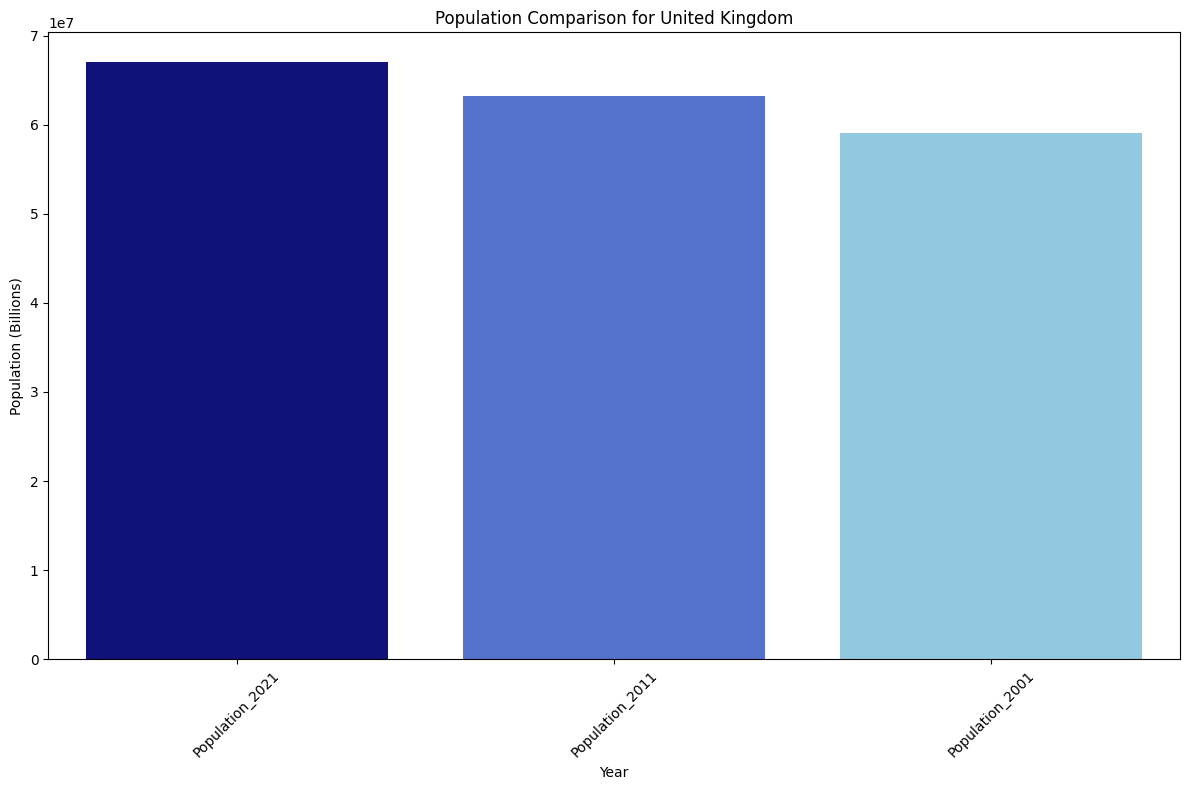

In [113]:
# UK Population in each year
fig = plt.figure(figsize=(12, 8))

# Melt the DataFrame
dfm = pd.melt(UK, var_name="year", value_name="Population")

# Define the color palette
palette = ["darkblue", "royalblue", "skyblue"]

# Create the barplot with specified colors
ax = sns.barplot(x="year", y="Population", hue="year", data=dfm, palette=palette)

# Customize labels and title
ax.set(xlabel="Year", ylabel="Population (Billions)", title="Population Comparison for United Kingdom")
plt.xticks(rotation=45)

# Reorder the years from smallest to largest
dfm["year"] = pd.Categorical(dfm["year"], categories=["2001", "2011", "2021"], ordered=True)
dfm.sort_values(by="year", inplace=True)

# Show the plot
plt.tight_layout()
plt.show()

In [114]:
uk_2001 = UK['Population_2001'].values[0]
uk_2021 = UK['Population_2021'].values[0]
uk_diff = round((uk_2021 - uk_2001) / 1000000, 1)
print(f"The UK's population grew by {uk_diff} million between 2001 & 2021")

The UK's population grew by 7.9 million between 2001 & 2021


### Individual UK Countries
In this section I will look compare each country (England, Scotland, Wales and Northern Ireland).

<Figure size 1200x800 with 0 Axes>

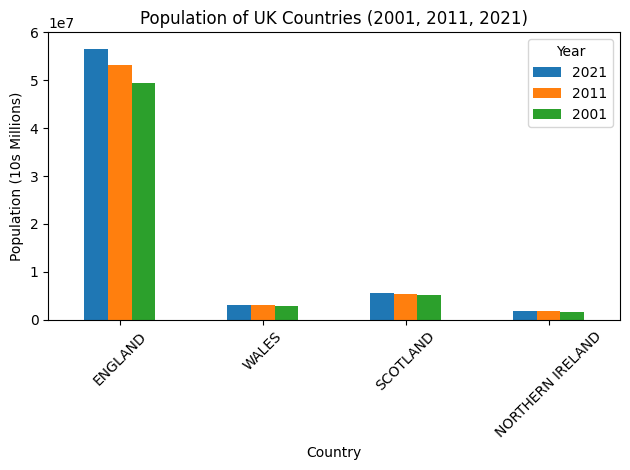

In [115]:
#Grouped bar plot to show population for each country
plt.figure(figsize=(12,8))
UK_countries.plot(kind='bar', x='Name', stacked=False)
plt.xlabel('Country')
plt.ylabel('Population (10s Millions)')
plt.title('Population of UK Countries (2001, 2011, 2021)')
plt.legend(title='Year', labels=['2021','2011', '2001'])
plt.ylim(bottom=0, top=60000000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
#England
eng_2001 = UK_countries[UK_countries['Name'] == 'ENGLAND']['Population_2001'].values[0]
eng_2021 = UK_countries[UK_countries['Name'] == 'ENGLAND']['Population_2021'].values[0]
eng_diff = round(eng_2021 / eng_2001, 2)
print(f'There was an population increase of {eng_diff} million in England between 2001 and 2021.')

#Scotland
scot_2001 = UK_countries[UK_countries['Name'] == 'SCOTLAND']['Population_2001'].values[0]
scot_2021 = UK_countries[UK_countries['Name'] == 'SCOTLAND']['Population_2021'].values[0]
scot_diff = round(scot_2021 / scot_2001, 2)
print(f'There was an population increase of {scot_diff} million in Scotland between 2001 and 2021.')

#Wales
wal_2001 = UK_countries[UK_countries['Name'] == 'WALES']['Population_2001'].values[0]
wal_2021 = UK_countries[UK_countries['Name'] == 'WALES']['Population_2021'].values[0]
wal_diff = round(wal_2021 / wal_2001, 2)
print(f'There was an population increase of {wal_diff} million in Wales between 2001 and 2021.')

#Northern Ireland
ni_2001 = UK_countries[UK_countries['Name'] == 'NORTHERN IRELAND']['Population_2001'].values[0]
ni_2021 = UK_countries[UK_countries['Name'] == 'NORTHERN IRELAND']['Population_2021'].values[0]
ni_diff = round(ni_2021 / ni_2001, 2)
print(f'There was an population increase of {ni_diff} million in Wales between 2001 and 2021.')

#Total increase
total = eng_diff + scot_diff + wal_diff + ni_diff

print(f"That's a total increase of {total} million people throughout the UK between 2001 and 2021")

There was an population increase of 1.14 million in England between 2001 and 2021.
There was an population increase of 1.08 million in Scotland between 2001 and 2021.
There was an population increase of 1.07 million in Wales between 2001 and 2021.
There was an population increase of 1.13 million in Wales between 2001 and 2021.
That's a total increase of 4.42 million people throughout the UK between 2001 and 2021


### England Regions
In this section I look at the different regions of England.

<Figure size 1200x600 with 0 Axes>

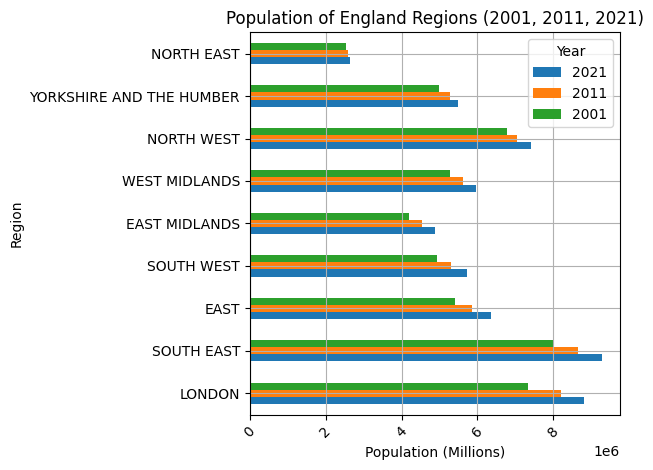

In [117]:
#Group bar plot to show population for each country
plt.figure(figsize=(12,6))
regions_pop.plot(kind='barh', x='Name', stacked=False)
plt.xlabel('Population (Millions)')
plt.ylabel('Region')
plt.title('Population of England Regions (2001, 2011, 2021)')
plt.legend(title='Year', labels=['2021','2011', '2001'])
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()

In [118]:
regions_pop.head()

,Name,Population_2021,Population_2011,Population_2001
213,LONDON,8796628,8204407,7322403
247,SOUTH EAST,9294023,8652784,8023449
162,EAST,6348096,5862418,5400463
318,SOUTH WEST,5712840,5300831,4943364
87,EAST MIDLANDS,4880094,4537448,4189622


In [119]:
#Calculate Population increase and add to a new column
regions['Population_Increase'] = regions['Population_2021'] - regions['Population_2001']

<ipython-input-119-248d504cabe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['Population_Increase'] = regions['Population_2021'] - regions['Population_2001']


In [120]:
#Sort London Boroughs dataframe by Population_Increase.
regions = regions.sort_values(by='Population_Increase', ascending=False)
regions.head()

,Name,Population_2021,Population_2011,Population_2001,Population_Increase
213,LONDON,8796628,8204407,7322403,1474225
247,SOUTH EAST,9294023,8652784,8023449,1270574
162,EAST,6348096,5862418,5400463,947633
318,SOUTH WEST,5712840,5300831,4943364,769476
87,EAST MIDLANDS,4880094,4537448,4189622,690472


After calculating the Population increase column and sorting, we can see that London had the largest population increase with 1,474,225 people. Followed by the South East with 1,270,574 people.

In [121]:
#Sort London Boroughs dataframe by Population_Increase.
regions = regions.sort_values(by='Population_Increase', ascending=True)
regions.head()

,Name,Population_2021,Population_2011,Population_2001,Population_Increase
4,NORTH EAST,2646772,2596441,2540090,106682
62,YORKSHIRE AND THE HUMBER,5481431,5288212,4976643,504788
18,NORTH WEST,7422295,7055961,6772985,649310
127,WEST MIDLANDS,5954240,5608667,5280727,673513
87,EAST MIDLANDS,4880094,4537448,4189622,690472


After sorting Population_Increase in ascending order, we can see the the North East grew the least with a population increase of 106,682.

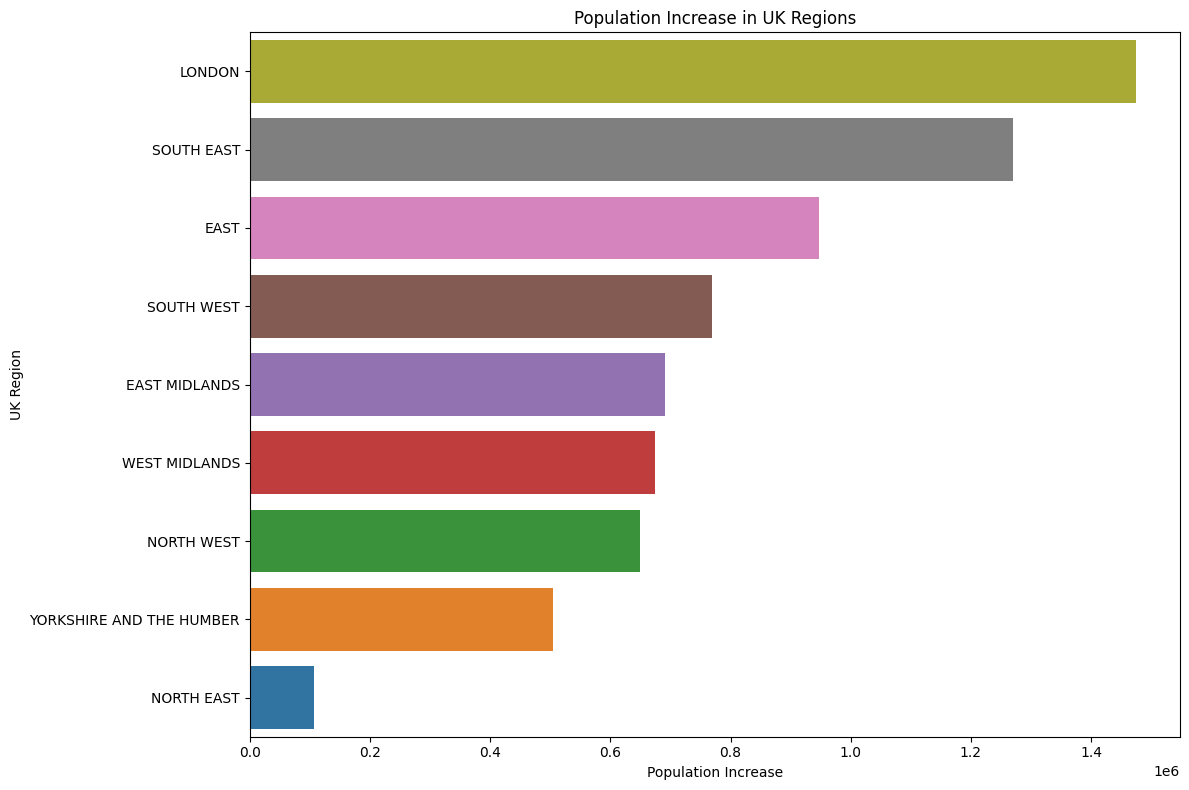

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(x='Population_Increase', y='Name', data=regions, hue='Name')
plt.xlabel('Population Increase')
plt.ylabel('UK Region')
plt.title('Population Increase in UK Regions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### London Boroughs
In this section I look at London Boroughs.

In [123]:
#Create geographic data.
gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
gdf = gdf.rename(columns={'NAME': 'Name'})

In [124]:
#Merge geographic data with dataframe
merged_data = gdf.merge(london_boroughs, on='Name')

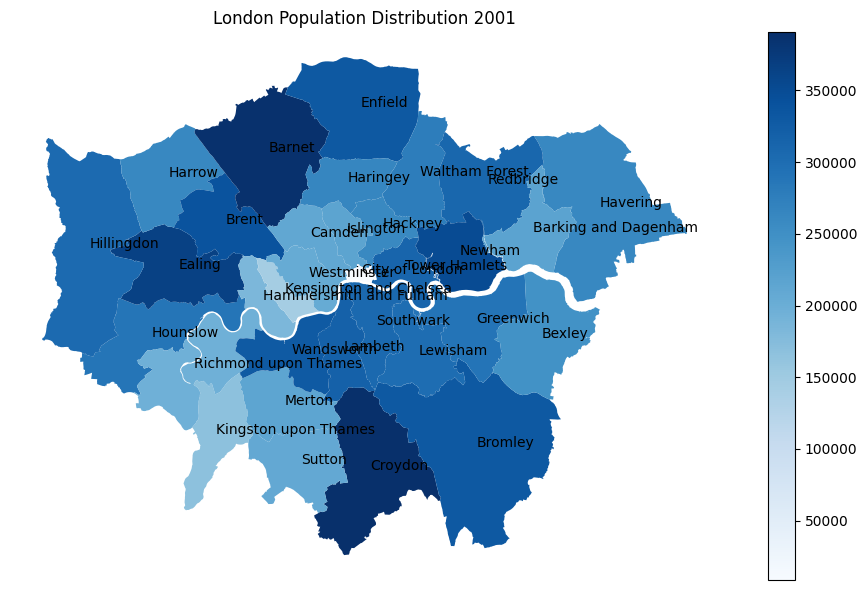

In [125]:
# Define a colormap (adjust the range based on your data)
cmap = "Blues"  # You can explore other colormaps like "Blues" or "Reds"

# Create the choropleth map
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column="Population_2021", ax=ax, cmap=cmap, legend=True)
ax.set_title("London Population Distribution 2001")

#Remove x & y axis
ax.axis('off')

# Add borough names as annotations
for idx, row in merged_data.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.annotate(row["Name"], (x, y), xytext=(x + 0.1, y + 0.1), color="black")

plt.tight_layout()
plt.show()

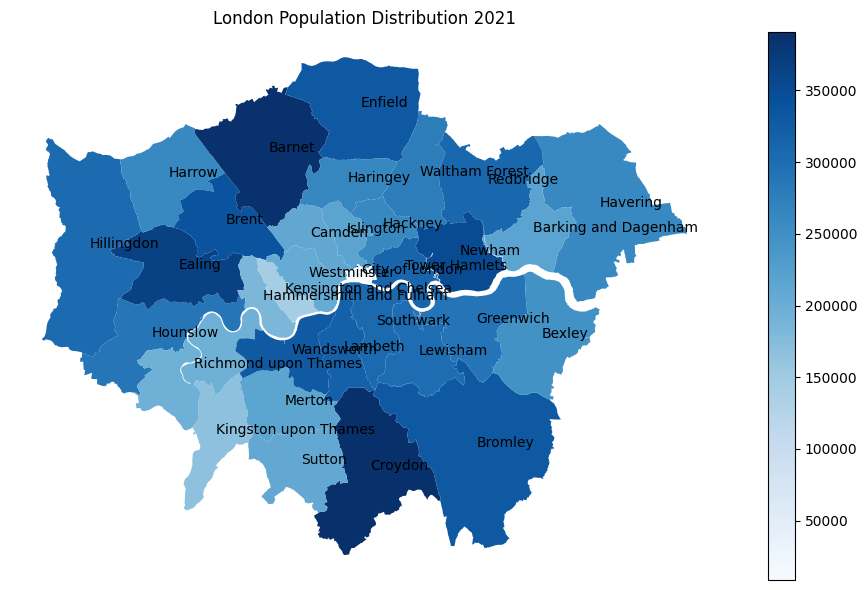

In [126]:
# Define a colormap (adjust the range based on your data)
cmap = "Blues"  # You can explore other colormaps like "Blues" or "Reds"

# Create the choropleth map
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column="Population_2021", ax=ax, cmap=cmap, legend=True)
ax.set_title("London Population Distribution 2021")

#Remove x & y axis
ax.axis('off')

# Add borough names as annotations
for idx, row in merged_data.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.annotate(row["Name"], (x, y), xytext=(x + 0.1, y + 0.1), color="black")

plt.tight_layout()
plt.show()

In [127]:
del london_boroughs['Code']
del london_boroughs['Area (sq km)']
del london_boroughs['2021_pop_area']
del london_boroughs['2011_pop_area']
del london_boroughs['2001_pop_area']
del london_boroughs['Geography']
london_boroughs.head()

,Name,Population_2021,Population_2011,Population_2001
214,Camden,210390,220087,202567
215,City of London,8618,7412,7359
216,Hackney,259956,247182,207246
217,Hammersmith and Fulham,183295,182445,169374
218,Haringey,264130,255540,221251


In [128]:
#Top ten london boroughs
top_london_boroughs = london_boroughs.sort_values(by='Population_2021', ascending=False).head(15)

<Figure size 1400x1000 with 0 Axes>

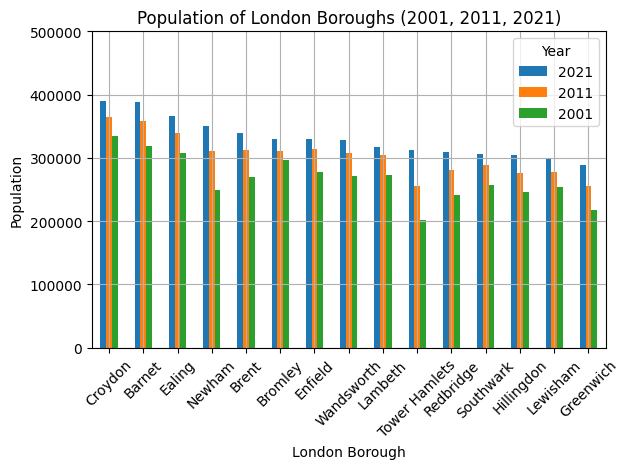

In [129]:
plt.figure(figsize=(14,10))
#Group bar plot to show population for each country
top_london_boroughs.plot(kind='bar', x='Name', stacked=False)
plt.xlabel('London Borough')
plt.ylabel('Population')
plt.title('Population of London Boroughs (2001, 2011, 2021)')
plt.legend(title='Year', labels=['2021','2011', '2001'])
plt.ylim(bottom=0, top=500000)
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()

You can see from the plot taht Croydon has the largest population of the London boroughs and has been consistently since 2001.

Another borough of interest is Lambeth which has a population of just below 200,000 people in 2001 but has increase to just over 300,000 in 20 years.

In [130]:
#Calculate Population increase and add to a new column
london_boroughs['Population_Increase'] = london_boroughs['Population_2021'] - london_boroughs['Population_2001']

<ipython-input-130-cf9d709759b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_boroughs['Population_Increase'] = london_boroughs['Population_2021'] - london_boroughs['Population_2001']


In [131]:
#Sort London Boroughs dataframe by Population_Increase.
london_boroughs = london_boroughs.sort_values(by='Population_Increase', ascending=False)
london_boroughs.head()

,Name,Population_2021,Population_2011,Population_2001,Population_Increase
225,Tower Hamlets,312273,256012,201090,111183
223,Newham,350626,310460,249411,101215
240,Hounslow,287940,254927,215976,71964
236,Greenwich,289254,255483,217460,71794
231,Brent,338918,312245,269620,69298


After adding the Population Increase column and sorting the values, we can see that Tower Hamlets had the largest population increase of all London Boroughs.

In [132]:
#Sort London Boroughs dataframe by Population_Increase.
london_boroughs = london_boroughs.sort_values(by='Population_Increase', ascending=True)
london_boroughs.head()

,Name,Population_2021,Population_2011,Population_2001,Population_Increase
220,Kensington and Chelsea,143940,158251,162199,-18259
215,City of London,8618,7412,7359,1259
227,Westminster,205087,219582,203329,1758
214,Camden,210390,220087,202567,7823
217,Hammersmith and Fulham,183295,182445,169374,13921


If we reverse the sorting we can see the London Boroughs which grew the least. In the table above we can see that Kensington and Chelsea decreased between 2001 and 2021 by 18,259 people.

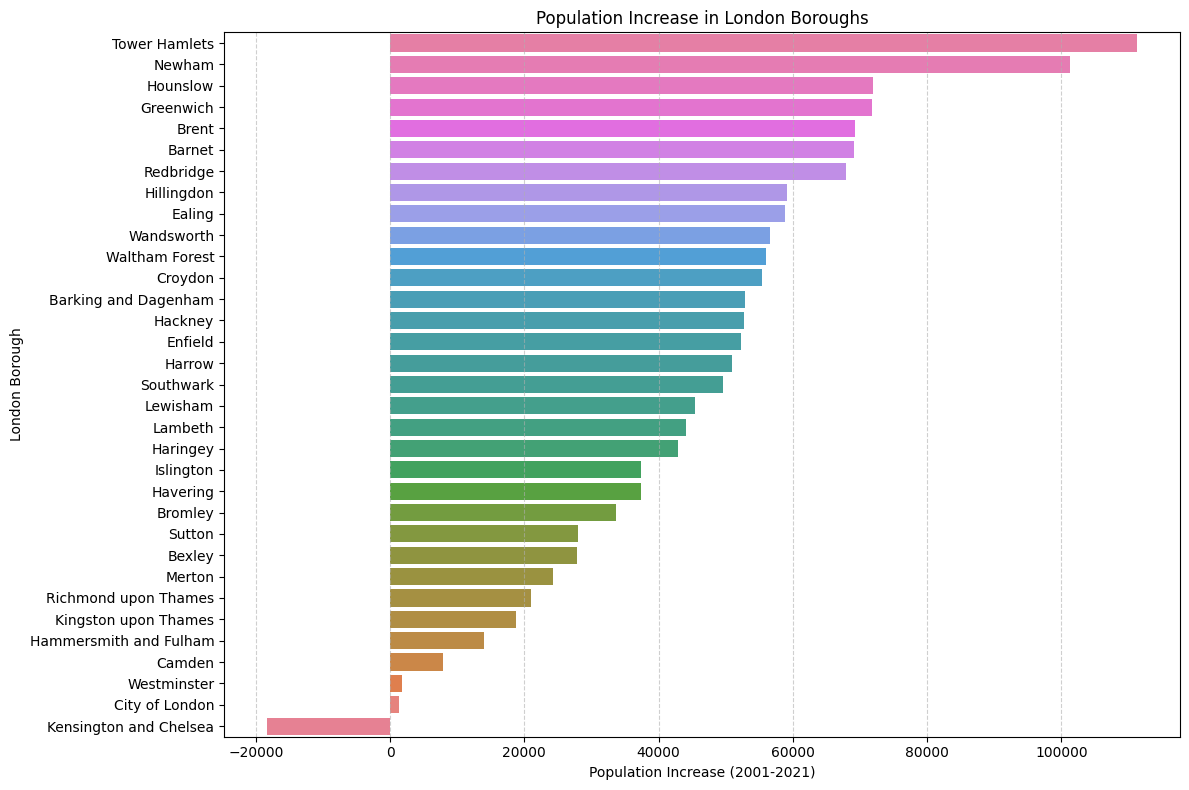

In [133]:
plt.figure(figsize=(12,8))
sns.barplot(x='Population_Increase', y='Name', data=london_boroughs, hue='Name')
plt.xlabel('Population Increase (2001-2021)')
plt.ylabel('London Borough')
plt.title('Population Increase in London Boroughs')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()